In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

Loading data 'Auto-mpg dataset' from Kaggle. showing what it contains.
Then, I'll focues on five features - year, displacement, horsepower, weight, and acceleration
to predict (target) mpg.
* categorial variable is: year
* continuous variables are: displacement, horsepower, weight, and acceleration

In [3]:
# from https://www.kaggle.com/uciml/autompg-dataset/version/3
car_df = pd.read_csv('auto-mpg.csv')

In [4]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [40]:
# narrow down the data frame 
limited_car_df = car_df[['mpg','weight', 'model year', 'displacement', 'horsepower', 'acceleration']]

# look at the new table
print(limited_car_df.head())

# the size of 'n/a' values
print("\n\nThe total number of rows with unknow values: {}".format(len(limited_car_df) - len(limited_car_df.dropna())))

    mpg  weight  model year  displacement horsepower  acceleration
0  18.0    3504          70         307.0        130          12.0
1  15.0    3693          70         350.0        165          11.5
2  18.0    3436          70         318.0        150          11.0
3  16.0    3433          70         304.0        150          12.0
4  17.0    3449          70         302.0        140          10.5


The total number of rows with unknow values: 0


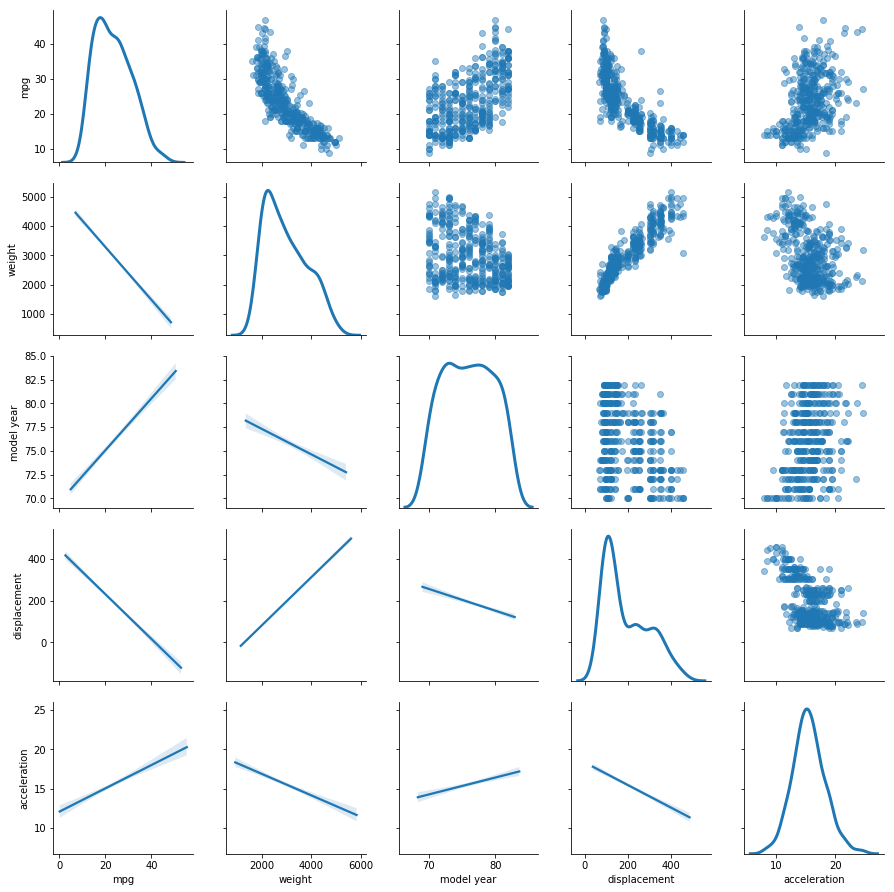

In [51]:
# Declare making a scatterplot matrix.
g = sns.PairGrid(limited_car_df, diag_sharey=False)

# Upper right - Scatterplot.
g.map_upper(plt.scatter, alpha=.45)

# Lower left - Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()

                   mpg    weight  model year  displacement  acceleration
mpg           1.000000 -0.831741    0.579267     -0.804203      0.420289
weight       -0.831741  1.000000   -0.306564      0.932824     -0.417457
model year    0.579267 -0.306564    1.000000     -0.370164      0.288137
displacement -0.804203  0.932824   -0.370164      1.000000     -0.543684
acceleration  0.420289 -0.417457    0.288137     -0.543684      1.000000


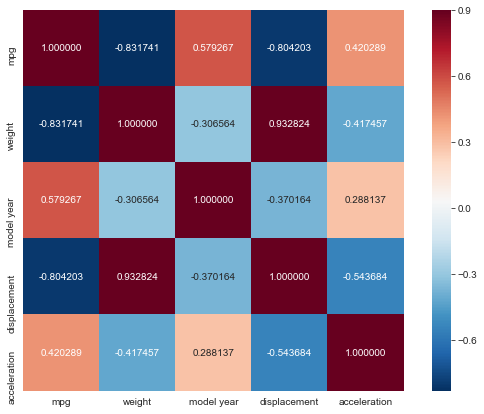

In [90]:
# See the correlation between the variables with numbers (between -1 to 1)
correlation = limited_car_df.corr()
print(correlation)

# Can also use a heatmap.
f, ax = plt.subplots(figsize=(10, 7))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.9, square=True, cmap="RdBu_r", annot=True, fmt="f")

plt.show()

From the above graph, 
the positive strong correlation seems to be between:
- weight and displacement (0.933)
- mpg and model year (0.580, less strong)

The inverse relationship seems to be between:
- mpg and weight (-0.832)
- mpg and displacement (-0.804)
- acceleration and displacement (-0.544 less strong)

Since the target is to predict the MPG, I'll focus on that.
So from the other variables, it seems that MPG is most affected by displacement, weight (both inverse relations), then the model year, and lastly some by the acceleration. 

Standardized the features (mean = 0 and variance = 1)

https://www.youtube.com/watch?v=kApPBm1YsqU